**LR：逻辑回归（Logistic Regression）**是一种用于解决二分类（0 或 1）问题的机器学习方法

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import nltk.classify.util
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.classify import NaiveBayesClassifier
import numpy as np
import re
import string
import nltk
%matplotlib inline

In [7]:
temp = pd.read_csv('F:\陶志远\Jupyter Notebook\Some Documents\Womens Clothing E-Commerce Reviews.csv', encoding='utf-8', engine='python')

In [99]:
print(type(temp))

<class 'pandas.core.frame.DataFrame'>


In [13]:
permanent = temp[['Rating', 'Review Text', 'Title', 'Age']]

In [14]:
permanent.head()

,Rating,Review Text,Title,Age
0,4,Absolutely wonderful - silky and sexy and comf...,NaN,33
1,5,Love this dress! it's sooo pretty. i happene...,NaN,34
2,3,I had such high hopes for this dress and reall...,Some major design flaws,60
3,5,"I love, love, love this jumpsuit. it's fun, fl...",My favorite buy!,50
4,5,This shirt is very flattering to all due to th...,Flattering shirt,47


In [22]:
print(permanent.isnull().sum())
permanent

Rating            0
Review Text     845
Title          3810
Age               0
dtype: int64


,Rating,Review Text,Title,Age
0,4,Absolutely wonderful - silky and sexy and comf...,NaN,33
1,5,Love this dress! it's sooo pretty. i happene...,NaN,34
2,3,I had such high hopes for this dress and reall...,Some major design flaws,60
3,5,"I love, love, love this jumpsuit. it's fun, fl...",My favorite buy!,50
4,5,This shirt is very flattering to all due to th...,Flattering shirt,47
...,...,...,...,...
23481,5,I was very happy to snag this dress at such a ...,Great dress for many occasions,34
23482,3,"It reminds me of maternity clothes. soft, stre...",Wish it was made of cotton,48
23483,3,"This fit well, but the top was very see throug...","Cute, but see through",31
23484,3,I bought this dress for a wedding i have this ...,"Very cute dress, perfect for summer parties an...",28


In [23]:
check = permanent[permanent['Title'].isnull()]
senti = permanent[permanent['Title'].notnull()]

In [34]:
senti["senti"] = senti["Rating"]>=4
senti["senti"] = senti["senti"].replace([True, False], ['pos', 'neg'])

D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


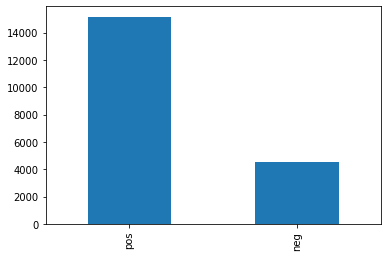

In [35]:
senti['senti'].value_counts().plot.bar()

In [36]:
senti.head()

,Rating,Review Text,Title,Age,senti
2,3,I had such high hopes for this dress and reall...,Some major design flaws,60,neg
3,5,"I love, love, love this jumpsuit. it's fun, fl...",My favorite buy!,50,pos
4,5,This shirt is very flattering to all due to th...,Flattering shirt,47,pos
5,2,"I love tracy reese dresses, but this one is no...",Not for the very petite,49,neg
6,5,I aded this in my basket at hte last mintue to...,Cagrcoal shimmer fun,39,pos


## 正则表达式

In [41]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
import numpy as np
import re
import string
import nltk

In [68]:
cleanup_re = re.compile('[^a-z]+')
def cleanup(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = cleanup_re.sub(' ', sentence).strip()
    return sentence
senti["Summary_Clean"] = senti["Review Text"].apply(cleanup)
check["Summary_Clean"] = check["Review Text"].apply(cleanup)

D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [69]:
#取 senti 数据集中的["Summary_Clean","senti"]，保存为 split。
split = senti[["Summary_Clean" , "senti"]]

In [70]:
train = split.sample(frac = 0.8, random_state = 200)
test = split.drop(train.index)

In [71]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
'''-----------------------------------------------'''
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
'''-----------------------------------------------------'''
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB ()

In [72]:
from wordcloud import STOPWORDS
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [73]:
#将训练集、测试集和验证集中的数据转成 list，并建立 index。
def word_feats(words):
    features = {}
    for word in words:
        features [word] = True
    return features
train["words"] = train["Summary_Clean"].str.lower().str.split()
test["words"] = test["Summary_Clean"].str.lower().str.split()
check["words"] = check["Summary_Clean"].str.lower().str.split()
train.index = range(train.shape[0])
test.index = range(test.shape[0])
check.index = range(check.shape[0])
prediction = {}

D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [74]:
#将 train["words"]的所有单词对应为 True，并按照评价打分划分标准在句子后面加上 neg或 pos。
train_naive = []
test_naive = []
check_naive = []
for i in range(train.shape[0]):
    train_naive = train_naive +[[word_feats(train["words"][i]) , train["senti"][i]]]
for i in range(test.shape[0]):
    test_naive = test_naive +[[word_feats(test["words"][i]) , test["senti"][i]]]
for i in range(check.shape[0]):
    check_naive = check_naive +[word_feats(check["words"][i])]
classifier = NaiveBayesClassifier.train(train_naive)
print("NLTK Naive bayes Accuracy : {}".format(nltk.classify.util.accuracy(classifier , test_naive)))
classifier.show_most_informative_features(5)

NLTK Naive bayes Accuracy : 0.8175349428208386
Most Informative Features
               execution = True              neg : pos    =     29.9 : 1.0
                   stain = True              neg : pos    =     29.9 : 1.0
              unwearable = True              neg : pos    =     25.9 : 1.0
                  poorly = True              neg : pos    =     24.7 : 1.0
                horrible = True              neg : pos    =     22.5 : 1.0


In [76]:
#使用训练好的分类器的给测试集和验证集打情感标签，预测测试集和验证集的单词词性是 pos 还是 neg。
y =[]
only_words= [test_naive[i][0] for i in range(test.shape[0])]
for i in range(test.shape[0]):
    y = y + [classifier.classify(only_words[i] )]
prediction["Naive"]= np.asarray(y)

In [77]:
y1 = []
for i in range(check.shape[0]):
    y1 = y1 + [classifier.classify(check_naive[i] )]
check["Naive"] = y1

D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [78]:
#原始数据集 check 没有 review.ratings 数据，从上图输出结果可看出，通过训练集建立分类器训练后，预测出每个单词词性是 pos 或 neg。
from sklearn.naive_bayes import MultinomialNB
stopwords = set(STOPWORDS)
stopwords.remove("not")

In [79]:
#整体来看，可先用CountVectorizer来提取特征，然后用TfidfTransformer计算特征的权重。
count_vect = CountVectorizer(min_df=2 ,stop_words=stopwords , ngram_range=(1,2))
tfidf_transformer = TfidfTransformer()
X_train_counts = count_vect.fit_transform(train["Summary_Clean"]) 
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_new_counts = count_vect.transform(test["Summary_Clean"])
X_test_tfidf = tfidf_transformer.transform(X_new_counts)
checkcounts = count_vect.transform(check["Summary_Clean"])
checktfidf = tfidf_transformer.transform(checkcounts)

D:\Software\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [80]:
#根据 tfidf_transformer 保留了重要词汇后，构建 MultinomialNB 模型
model1 = MultinomialNB().fit(X_train_tfidf , train["senti"])
prediction['Multinomial'] = model1.predict_proba(X_test_tfidf)[:,1]
print("Multinomial Accuracy : {}".format(model1.score(X_test_tfidf , test["senti"])))
check["multi"] = model1.predict(checktfidf)

Multinomial Accuracy : 0.7857687420584498


D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [81]:
#根据 tfidf_transformer 保留了重要词汇后，构建 Fit BernoulliNB 模型。
from sklearn.naive_bayes import BernoulliNB
model2 = BernoulliNB().fit(X_train_tfidf,train["senti"])
prediction['Bernoulli'] = model2.predict_proba(X_test_tfidf)[:,1]
print("Bernoulli Accuracy : {}".format(model2.score(X_test_tfidf , test["senti"])))
check["Bill"] = model2.predict(checktfidf)

Bernoulli Accuracy : 0.8612452350698856


D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [82]:
#根据 tfidf_transformer 保留了重要词汇后，构建 Fit LR 模型。
from sklearn import linear_model
logreg = linear_model.LogisticRegression(solver='lbfgs' , C=1000)
logistic = logreg.fit(X_train_tfidf, train["senti"])
prediction['LogisticRegression'] = logreg.predict_proba(X_test_tfidf)[:,1]
print("Logistic Regression Accuracy : {}".format(logreg.score(X_test_tfidf , test["senti"])))
check["log"] = logreg.predict(checktfidf)

Logistic Regression Accuracy : 0.8861499364675984


D:\Software\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [87]:
words = count_vect.get_feature_names()
feature_coefs = pd.DataFrame(
    data = list(zip(words, logistic.coef_[0])),
    columns = ['feature', 'coef'])
feature_coefs.sort_values(by="coef")
def formatt(x):
    if x == 'neg':
         return 0
    if x == 0:
        return 0
    return 1
vfunc = np.vectorize(formatt)
test.senti = test.senti.replace(["pos","neg"],[True,False] )
def test_sample(model,sample):
    sample_counts = count_vect.transform([sample])
    sample_tfidf = tfidf_transformer.transform(sample_counts)
    result = model.predict(sample_tfidf)[0]
    prob = model.predict_proba(sample_tfidf)[0]
    print("Sample estimated as %s: negative prob %f, positive prob %f" % (result.upper(), prob[0], prob[1]))
test_sample(logreg, "The product was good and easy to use")
test_sample(logreg, "the whole experience was horrible and product is worst")
test_sample(logreg, "product is not good")

Sample estimated as POS: negative prob 0.183276, positive prob 0.816724
Sample estimated as NEG: negative prob 0.999733, positive prob 0.000267
Sample estimated as NEG: negative prob 0.999988, positive prob 0.000012


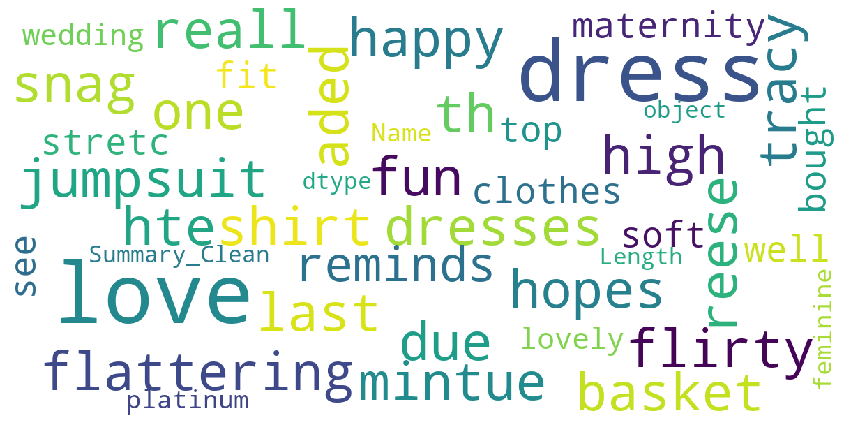

In [98]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
mpl.rcParams['font.size']=12 #10 
mpl.rcParams['savefig.dpi']=100 #72 
mpl.rcParams['figure.subplot.bottom']=.1 
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
        ).generate(str(data))
 
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(senti["Summary_Clean"])

# 步骤

1、开发流程

    1）获取数据集
    
    2）数据预处理（缺失值处理、异常值处理、不均衡数据处理...）
    
    3）创建模型
    
    4）模型训练和模型测试
    
    5）模型部署
    
2、数据集处理

    情感分析的数据集一般面临不均衡数据的问题，会影响分析效果,比如不同极性的评论数量差距太大（比如 10^6 好评 vs10^4 差评），会导致分类器模型参数异常。
    
    解决方式：重抽样或采用代价敏感学习。
3、主要分析方法
    
    实验采用3种模型：LogisticRegression、Multinomial NB 和 Bernouli NB，分别输出 3 种模型的 ROC，比较哪种模型更适合此数据集。